## CIS 9

## Supervised Learning: Classification

Reading
- Python Data Handbook Chapter 5: Decision Trees
- Python Data Handbook Chapter 5: Gaussian Naive Bayes
- Think Stats: Probability - Bayes's Theorem

Classification, or classification predictive modeling, uses algorithms that learn from a set of input features X and associated labels y, such that when presented with a new set of features X, the algorithms can correctly predict the y outcome. On the surface, classification sounds like regression: using training data X and y to learn, then correctly predict the output y for some new X. And that's because both classification and regression are supervised learning.

The difference between regression and classification is in the type of X and y data.
- For regression, the X and predicted y data are _quantitative_ data, or a number within a range of values. An example of quantitative data is the cost of a car within a range of 0 to 200,000 dollars.
- For classification, the X and predicted y data are _categorical_ data, or a type of object from a set of different types. An example of categorical data is the type of car from the categories of compact, sport, sedan, or luxury cars.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Decision Tree

A decision tree is one of the most common _classification_ model, but a decision tree can also be used for a _regression_ problem.<br>
The decision tree is a flow chart that is a tree structure. There is a root note at the top, which branches into 2 child nodes, a left child and right child. Each child node, in turn, branches into 2 more child nodes, until the path reaches a terminal or end node called a leaf node.

Every node holds a test for an X attribute. The result of the test (True or False) determines which of the 2 branches will be selected. The algorithm starts at the root node and traverses down the tree. At each node it tests the X attribute and then takes the resulting path to reach the next child node. When it reaches the leaf node, the value at the leaf node is the output y label.

We use data in the file `zoo.csv` ([source](https://www.kaggle.com/uciml/zoo-animal-classification)). The dataset consists of features of different animals at a zoo, and the animals are divided into 7 different types: 4-legged animals, fish, birds, crustaceans, amphibians, insects, reptiles.

1. Read data into a DataFrame called __a__. Then print the size and first 5 lines of the DataFrame.

In [2]:
a = pd.read_csv("zoo.csv") 
print(a.shape)
a.head()

(101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


2. Create the X data, which is the DataFrame a but with no 'animal_name' or 'class_type' columns.
<br>Create the y data, which is the 'class_type' column.
<br>Print the size of X and y, and show the first 5 lines of X

In [3]:
y = a.class_type 
X = a.drop(columns=['animal_name','class_type'])
print(y.shape)
print(X.shape)
X.head()

(101,)
(101, 16)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


3. Note that the data in x are conveniently numbers already. Otherwise we'd have to convert any text strings into numbers.
<br>Split the data into a training set and a test set.
<br>Show the size of the sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


4. First we use a decision tree for a _regression_ model. Recall that a linear regression works well when there is a direct correlation between the X features and y labels. In this example, the y labels are dependent on multiple X features, and there is not necessarily a direct relationship between X and y. For example, an animal which is a predator (an X feature) does not guarantee that it's a specific type of animal (y label). Therefore a decision tree regressor may work better than linear regression.<br>
Create the decision tree regressor and train the regressor.

In [5]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor()
regr = regr.fit(X_train, y_train)

5. Inspect the decision tree that was created by the algorithm

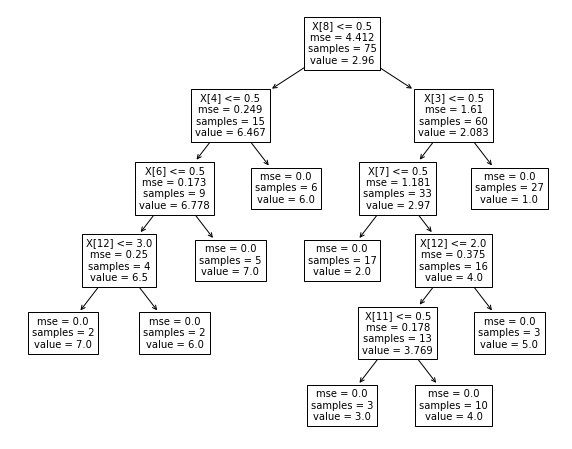

In [6]:
from sklearn import tree

matplotlib.rcParams['figure.figsize'] = (10, 8)
tree.plot_tree(regr, fontsize=10)
plt.show()

6. See how well the regressor works

In [7]:
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
df

(26, 2)


,Actual,Predicted
0,1,1.0
68,1,1.0
3,1,1.0
43,2,2.0
66,1,1.0
77,7,7.0
50,1,1.0
55,1,1.0
13,7,7.0
90,3,2.0


Note that the predicted values are floating point numbers, not integers as the y labels.<br>
Why?

In [8]:
metrics.accuracy_score(y_test, y_pred)   
# accuracy score between 0 and 1, with 1 being 100% accurate

0.9230769230769231

In [9]:
# another way to see how well the model works is with the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(1,8)))

[[14  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  1  0  0  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3]]


The columns are the predicted values (or y_pred) and the rows are the actual values (or y_test).
<br>With a 100% accurate score, the matrix will have non-zeros only across the diagonal from [0,0] to [n,n].
<br>If there are values not on the diagonal, it means the model made a wrong prediction.

Just like with multi-linear regression, the model can also tell us the contribution of each X feature in predicting the y output.

In [10]:
features = pd.DataFrame(regr.feature_importances_, X.columns, columns=['Importance'])
features

,Importance
hair,0.000000
feathers,0.000000
eggs,0.000000
milk,0.174122
airborne,0.006582
aquatic,0.000000
predator,0.001679
toothed,0.099642
backbone,0.696819
breathes,0.000000


---

Since the y labels are 7 specific types of animal, this problem is more appropriately a _classification_ problem.<br>
Create the decision tree _classifier_ and train the classifier, using the same X and y training sets.

In [11]:
from sklearn.tree import DecisionTreeClassifier

regr = DecisionTreeClassifier()
regr = regr.fit(X_train, y_train)

Check how well the classifier works by doing the same comparison as step 6.<br>
Then find the accuracy score and confusion matrix.

In [12]:
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
df

(26, 2)


,Actual,Predicted
0,1,1
68,1,1
3,1,1
43,2,2
66,1,1
77,7,7
50,1,1
55,1,1
13,7,7
90,3,6


In [13]:
metrics.accuracy_score(y_test, y_pred) 

0.9230769230769231

In [14]:
print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(1,8)))

[[14  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  0  1  1  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3]]


Extending from the Decision Tree model is the __Random Forest__ model. For some applications one decision tree is not sufficient to produce effective output. Random Forest is an algorithm that uses multiple decision trees (or a forest of trees) to make decisions. The algorithm randomly creates decision trees, and each node in a decision trees has a random subset of features to calculate the output. The algorithm then combines the output of the individual decision trees to get the final output.

### K Nearest Neighbor

The K Nearest Neighbor, or KNN, algorithm is called a lazy learning algorithm, which means it does not use any training data to generate the model. This is in contrast to the Decision Tree algorithm, which generates the tree during training. For KNN, all training data are only stored but not used during the training stage. During the testing stage the algorithm will use the training data with the test data to make the predictions. This makes training faster but makes the testing slower.

To predict an outcome, the algorithm plots the new data with the stored training data. Then it locates the training data points that are closest to the new data. These nearest training data points, or the nearest neighbors, determine the output prediction of the new data. For example, if the features of the new data cause it to be plotted near training data of type T, then the prediction for the new data will be type T.

In KNN, K is the number of nearest neighbors that the algorithm will use to make the prediction. We can adjust the K value to help the model be more accurate. A small K value may not be as accurate as a larger K value, but a K value that's too large will include neighbors that are too far away and introduce errors into the evaluation or be computationally costly.

7. We use the same data from `zoo.csv` above, so we can still use the same training and testing data.
<br>Create a KNN classifer, train and test the classifier

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

8. Check how well the classifier works by doing the same comparison as step 6.<br>
Then find the accuracy score and confusion matrix.

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
df

(26, 2)


,Actual,Predicted
0,1,1
68,1,1
3,1,1
43,2,2
66,1,4
77,7,3
50,1,1
55,1,1
13,7,3
90,3,1


In [18]:
metrics.accuracy_score(y_test, y_pred)

0.8076923076923077

In [19]:
print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(1,8)))

[[13  0  0  1  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 1  0  0  0  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1]]


We've been using the default parameters for the algorithms that we've discussed. But for KNN there is a parameter K that requires an input. The K value is a way that we can do some basic _tuning_ of the algorithm to make it more accurate. 

We can loop through the K values to observe the accuracy of the resulting predictions.

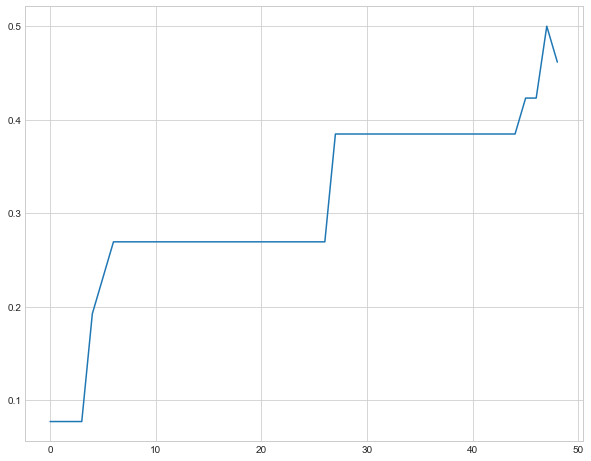

In [20]:
# we loop through K values from 1 to 50, using the same X and y datasets
errors = []
for i in np.arange(1, 50):
    c = KNeighborsClassifier(n_neighbors = i)
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    errors.append(np.mean(y_pred != y_test))
    
# see what the error rate looks like
plt.style.use('seaborn-whitegrid')
plt.plot(errors)

From the plot, we can see that KNN is not a good classifier for this dataset. The prediction is most accurate when K is 2! From the plot we observe that as we use a higher number of neighbors, or higher K, the error rate goes up. This means that looking at the closest neighbors doesn't help us to arrive at a good prediction for what type of animal it is. For this dataset it can make sense. There are many features in the dataset (18) compared to the size of the dataset  (101 samples). Therefore, it's likely that the neighbors don't share many features, so using more neighbors will make the prediction less accurate.

### Naive Bayes

The Naive Bayes (NB) model is based on the Bayesian theorem, which calculates the likelihood of an output label, given some observed features. For example, if the features are dark clouds and strong winds, then the likelihood for stormy weather is high and the likelihood for sunny weather is low.

When calculating the likelihood of the output label, the model assumes that all features are independent of each other, which isn't always true, and this is the reason why the model is called naive. 

We start by investigating the Gaussian Naive Bayes model. The Gaussian term means that we assume the features have a Gaussian distribution, which is a common distribution for many events or measurements.

9. We start by observing the dataset again

In [21]:
a.head(8)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4


We see that many features are independent, such as being aquatic and being a predator, but some features are dependent, such as having hair means not having feathers. 
<br>With the NB model, if an animal has hair, is a predator with teeth, backbone, and other features of a bear, then the probability of it being a bear is high, and the model will classify this animal as a bear.

10. Use the same training and testing data

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


11. Create the classifier, train the classifier, test the classifier

In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

12. Check the result by comparing actual and predicted data

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
df

(26, 2)


,Actual,Predicted
0,1,1
68,1,1
3,1,1
43,2,2
66,1,1
77,7,7
50,1,1
55,1,1
13,7,7
90,3,7


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9230769230769231


Another type of Naive Bayes classification is the __Multinomial Naive Bayes__ model. The model also uses the combined probabilities of the features to predict the output, but it also takes into account the number of occurrences of a feature. 

Multinomial Naive Bayes is often used for classification of text or reading material. For example, if a reading passage has the words 'Congress', 'election', 'vote', 'political', '2020', then there's a small chance of it being about the 2020 election, but if the '2020' appears many times in the reading, then the probability of it being about the 2020 election is high.

## Measuring classifications
<br>In addition to the accuracy score, another common measurement for classification problems is the F1 score.

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8937728937728939

Accuracy is the rate of correct predictions. It is used when we want to know the number of correct predictions, which is when the algorithm correctly predicts a type T when it is actually type T.

Precision is the ratio of correct predictions for type T / total number of predictions for T
<br>Recall is the ratio of correct predictions for type T / all actual type T
<br>The F1 score is a type of mean between precision and recall. It is used when the datasets don't have an equal representation for each type that's being classified.

We've discussed 3 of the common classification models in supervised learning and how they work in general. It takes some more in-depth knowledge and statistical background to _tune_ or adjust a model so that it can be more accurate with a particular application. 